# Agriculture Problem

In [109]:
#Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [110]:
#Importing train and test excel file
df_train = pd.read_excel('train_agriculture.xlsx')
df_test = pd.read_excel('test_agriculture.xlsx')

In [111]:
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [112]:
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


Observation :

Information about train dataset attributes.

Id is object, Number weeks used is float and others are int.

In [114]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


Observation :

Information about test dataset attributes.

Id is object, Number weeks used is float and others are int.

## Summary Statistics

In [115]:
df_train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Observation : 

There are missing data in number weeks used.

In [116]:
df_test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


Observation :

There are some missing data in Number weeks used.

In [117]:
#Concating train and test data
df_train['Source']='train'
df_test['Source']='test'
df=pd.concat([df_train,df_test],ignore_index=True)

In [118]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Source
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1.0,train
2,F00000004,257,1,0,1,0,0.0,0,2,1.0,train
3,F00000005,257,1,1,1,0,0.0,0,2,1.0,train
4,F00000006,342,1,0,1,0,0.0,0,2,1.0,train


In [119]:
print(df_train.shape,df_test.shape,df.shape)

(4599, 11) (1199, 10) (5798, 11)


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   object 
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5237 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
 10  Source                   5798 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 498.4+ KB


In [121]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5237.000000,5798.000000,5798.000000,4599.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.920374,8.760262,1.891687,0.194390
std,821.330403,0.413280,0.499271,0.484594,15.655508,12.625594,9.582781,0.692997,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,28.000000,6.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,15.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Observation :

There are some missing data in crop damage because test file has no crop damage values.

In [122]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
Source                        0
dtype: int64

In [123]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Source
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1.0,train
2,F00000004,257,1,0,1,0,0.0,0,2,1.0,train
3,F00000005,257,1,1,1,0,0.0,0,2,1.0,train
4,F00000006,342,1,0,1,0,0.0,0,2,1.0,train


In [124]:
#finding unique values
uni_col=['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season' ]
for uni in uni_col:
    print(uni)
    print(df[uni].unique())
    print(df[uni].value_counts())
    print("---------------------------------\n")

Crop_Type
[1 0]
0    4531
1    1267
Name: Crop_Type, dtype: int64
---------------------------------

Soil_Type
[0 1]
0    3060
1    2738
Name: Soil_Type, dtype: int64
---------------------------------

Pesticide_Use_Category
[1 3 2]
2    3900
3    1831
1      67
Name: Pesticide_Use_Category, dtype: int64
---------------------------------

Season
[1 2 3]
2    2946
1    1740
3    1112
Name: Season, dtype: int64
---------------------------------



In [126]:
#Assigning mean values to nan values
print(df['Number_Weeks_Used'].mean())
df.Number_Weeks_Used.fillna(df.Number_Weeks_Used.mean(),inplace=True)

28.92037426007256


In [127]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used             0
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
Source                        0
dtype: int64

# Visualization

### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2C3F7F640>,
      dtype=object)

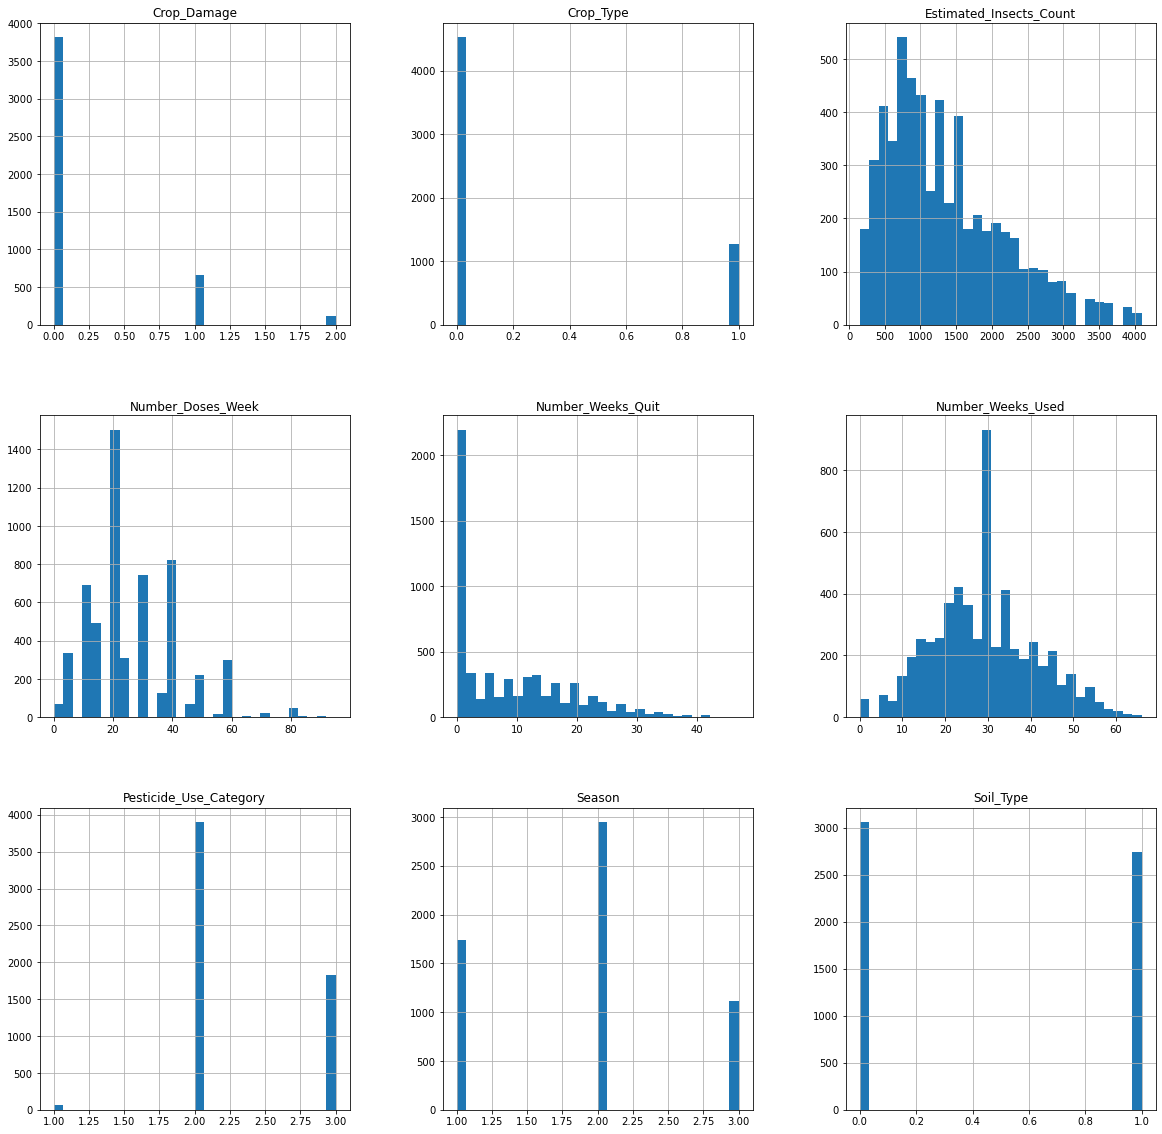

In [128]:
#Using histogram to check normal distribution
df.hist(figsize=(20,20),grid=True,bins=30)

Observation:

Estimated insect count histogram is right skewed.

Number week used is normaly distributed.

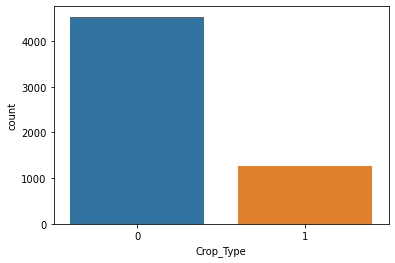

In [129]:
#visualization of Crop Type count
sns.countplot(x='Crop_Type',data=df)

Observation:

Crop type 0 count is more than crop type 1.

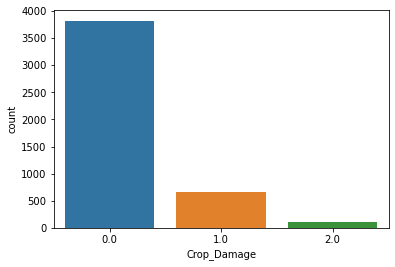

In [130]:
#visualization of Crop Damage count
sns.countplot(x='Crop_Damage',data=df)

Observation :

Most of the crops are alive.

Crops damaged due to pesticides are low compare to crops damaged due to other cause.

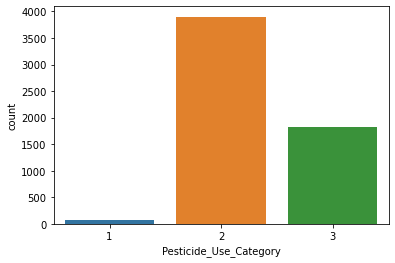

In [131]:
#visualization of Pesticide_Use_Category Count
sns.countplot(x='Pesticide_Use_Category',data=df)

Observation :

Previously used pesticides has maximum count.

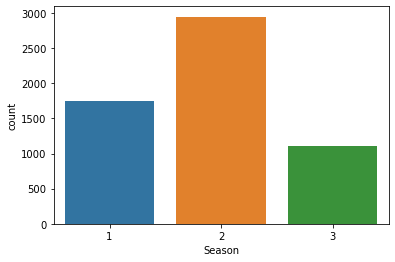

In [132]:
#visualization of Season Count
sns.countplot(x='Season',data=df)

Observation :

Season 2 has maximum count.

Season 3 has minimum count.

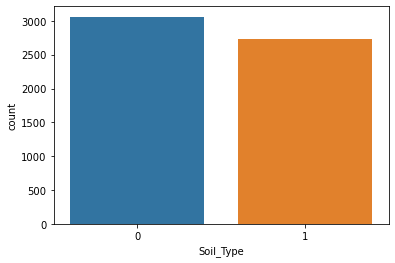

In [133]:
#visualization of Soil Type Count
sns.countplot(x='Soil_Type',data=df)

Observation :

Soil type 0 has maximum count than soil type 1.

### Bivariate Analysis

In [134]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'Source'],
      dtype='object')

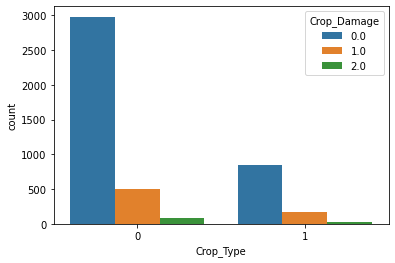

In [135]:
#visualization of Crop Type based on Crop Damage
sns.countplot(x='Crop_Type',hue='Crop_Damage',data=df)

Observation :

Crop type 0 has maximum damage(Other cause & Pesticides) than crop type 1.

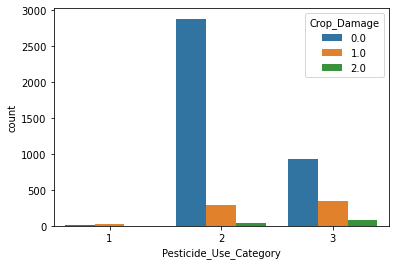

In [136]:
#visualization of Pesticide_Use_Category based on Crop Damage
sns.countplot(x='Pesticide_Use_Category',hue='Crop_Damage',data=df)

Observation :

Pesticide use category 3 or currently using pesiticides has maximum crop damage.

Low number of crop damage when pesiticides are never used.

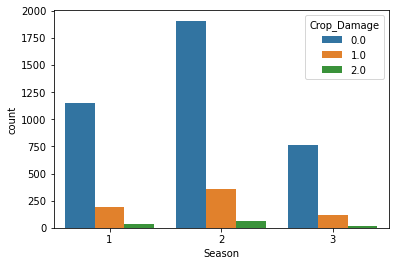

In [137]:
#visualization of Season based on Crop Damage
sns.countplot(x='Season',hue='Crop_Damage',data=df)

Observation :

Season 2 has maximum crop damages.

Season 3 has minimum crop damages.

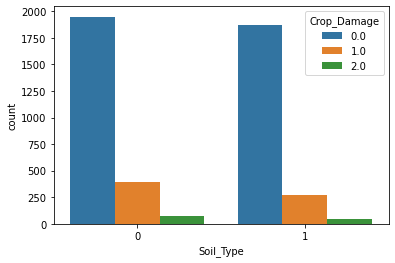

In [138]:
#visualization of Soil_Type based on Crop Damage
sns.countplot(x='Soil_Type',hue='Crop_Damage',data=df)

Observation : 

Soil type 0 makes more damages to crops than soil type 1.

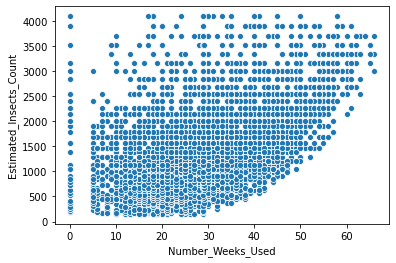

In [139]:
#visualization of Number weeks used and Estimated Insects Count
sns.scatterplot(x='Number_Weeks_Used',y='Estimated_Insects_Count',data=df)

Observation :

Number of weeks used increases, insect count also increasing.

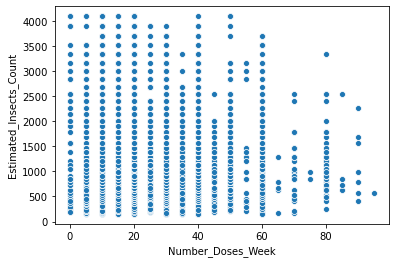

In [140]:
#visualization of Number doses week and Estimated Insects count
sns.scatterplot(x='Number_Doses_Week',y='Estimated_Insects_Count',data=df)

Observation :

As doses per week increases, insect count is decreasing.

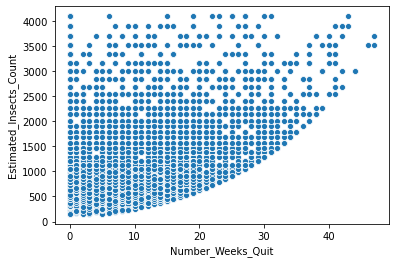

In [141]:
#visualization of Number weeks quit and Estimated Insects Count
sns.scatterplot(x='Number_Weeks_Quit',y='Estimated_Insects_Count',data=df)

Observation :

As number of weeks quit increases, insect count also increasing.

# Correlation

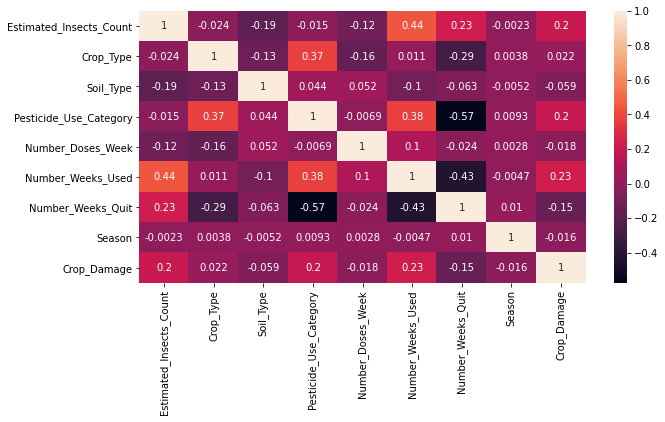

In [142]:
corr=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

Observation :

Number weeks used, pesticide use category and estimated insects count have high positive correlation.

Pesticide can damage the crops so they have positive correlation

As number of week pesiticide used may damage the crop or save the crop, so they have positive correlation.

Estimated insect count has positive correlation because they play a role in crop damages.

# Removing Column

In [143]:
#Removing ID column because they are unique identifier for each row
df.drop(['ID'],axis=1,inplace=True)

In [144]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Source
0,188,1,0,1,0,0.0,0,1,0.0,train
1,209,1,0,1,0,0.0,0,2,1.0,train
2,257,1,0,1,0,0.0,0,2,1.0,train
3,257,1,1,1,0,0.0,0,2,1.0,train
4,342,1,0,1,0,0.0,0,2,1.0,train


### Splitting train and test data

In [145]:
train=df.loc[df['Source']=="train"]
test=df.loc[df['Source']=="test"]

In [146]:
train.drop(['Source'],axis=1,inplace=True)
test.drop(['Source','Crop_Damage'],axis=1,inplace=True)

In [174]:
train.to_csv("Agriculture_train.csv",index=False)
test.to_csv("Agriculture_test.csv",index=False)

In [147]:
train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0.0
1,209,1,0,1,0,0.0,0,2,1.0
2,257,1,0,1,0,0.0,0,2,1.0
3,257,1,1,1,0,0.0,0,2,1.0
4,342,1,0,1,0,0.0,0,2,1.0


In [148]:
test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
4599,188,1,1,1,0,28.920374,0,2
4600,410,1,1,1,0,0.000000,0,2
4601,626,1,0,1,0,0.000000,0,2
4602,731,1,0,1,0,0.000000,0,2
4603,789,0,0,1,0,0.000000,0,1


# Outliers

Estimated_Insects_Count        AxesSubplot(0.125,0.71587;0.227941x0.16413)
Crop_Type                   AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Soil_Type                   AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Pesticide_Use_Category        AxesSubplot(0.125,0.518913;0.227941x0.16413)
Number_Doses_Week          AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Number_Weeks_Used          AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Number_Weeks_Quit             AxesSubplot(0.125,0.321957;0.227941x0.16413)
Season                     AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Crop_Damage                AxesSubplot(0.672059,0.321957;0.227941x0.16413)
dtype: object

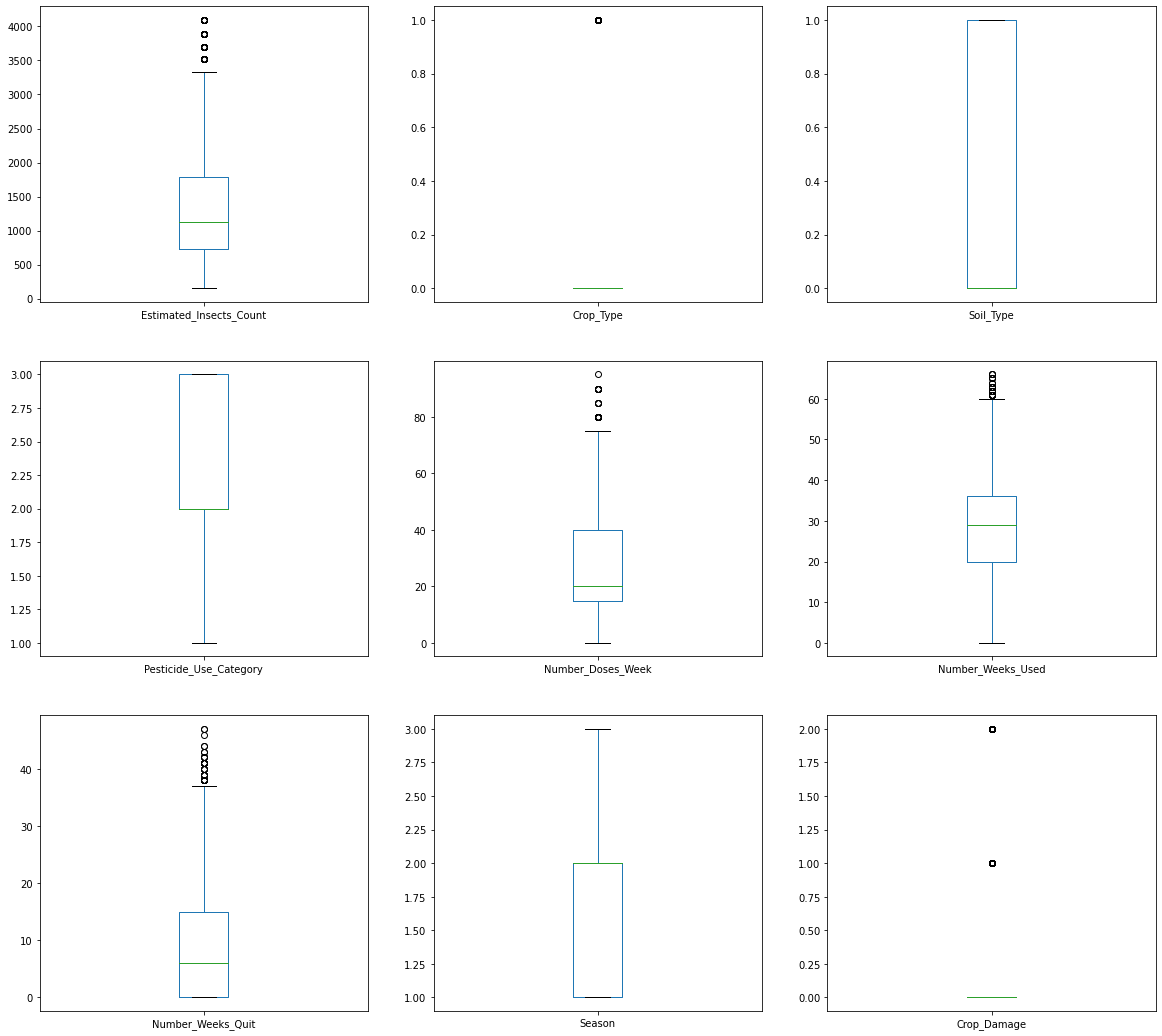

In [149]:
df.plot(figsize=(20,25),kind='box',layout=(4,3),subplots=True)

Observation : 

Estimated insect counts, number weeks used and number weeks quit have more outliers.

In [150]:
#using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(train))
threshold=3
new_df=train[(z<3).all(axis=1)]
print(train.shape)
print(new_df.shape)

(4599, 9)
(4370, 9)


In [ ]:
Observation :

## Skewness

In [151]:
new_df.skew()

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.274590
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

In [152]:
#Reducing Skewness using square root method
for col in new_df.columns:
    if new_df.skew().loc[col]>0.55:
        new_df[col] = np.sqrt(new_df[col])

In [153]:
new_df.skew()

Estimated_Insects_Count    0.179172
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.588515
Number_Doses_Week         -0.097393
Number_Weeks_Used          0.274590
Number_Weeks_Quit          0.006921
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

Observation :

Crop type and crop damage has high skewness.

# Scaling

In [154]:
#Assigning input and target data
X=new_df.drop(['Crop_Damage'],axis=1)
Y=new_df[['Crop_Damage']]

In [155]:
#Scaling data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ScaledX=sc.fit_transform(X)

# Model Training

In [156]:
#importing imporant libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#importing train test split library
from sklearn.model_selection import cross_val_score, train_test_split

#importing error metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score

In [157]:
#Finding best model and random state
best_rstate_clas=0
best_accu_rate=0
models=[RandomForestClassifier(), LogisticRegression(), AdaBoostClassifier(), 
       GradientBoostingClassifier(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier(), GaussianNB(), BaggingClassifier(), ExtraTreesClassifier()]
for r in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(ScaledX,Y,test_size=0.33,random_state=r, stratify=Y)
    for model in models:
        model.fit(x_train,y_train)
        pred_test=model.predict(x_test)
        pred_train=model.predict(x_train)
        #accu_score=accuracy_score(y_test,model_pred)
        if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
            print("best random state",r)
            print("At random state",r)
            print("Training score :",accuracy_score(y_train,pred_train)*100)
            print("Testing score :",accuracy_score(y_test,pred_test)*100)
            print("Model : ", model)

best random state 7
At random state 7
Training score : 85.0700375811411
Testing score : 85.1004851004851
Model :  LogisticRegression()
best random state 9
At random state 9
Training score : 85.95831909805261
Testing score : 86.00138600138601
Model :  SVC()
best random state 12
At random state 12
Training score : 84.21592073795695
Testing score : 84.1995841995842
Model :  GaussianNB()
best random state 15
At random state 15
Training score : 85.95831909805261
Testing score : 86.00138600138601
Model :  SVC()
best random state 16
At random state 16
Training score : 84.93337888623164
Testing score : 84.89258489258489
Model :  LogisticRegression()
best random state 19
At random state 19
Training score : 84.93337888623164
Testing score : 84.89258489258489
Model :  LogisticRegression()
best random state 22
At random state 22
Training score : 85.99248377177999
Testing score : 86.00138600138601
Model :  SVC()
best random state 25
At random state 25
Training score : 85.03587290741373
Testing scor

Observation :

SVC and AdaBoostClassifier are the best model.

Best random state is 185.

# Grid Search CV

In [158]:
x_train, x_test, y_train, y_test=train_test_split(ScaledX,Y,test_size=0.33,random_state=185)

param_grid_SVC = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

gridsearch_SVC=GridSearchCV(SVC(), param_grid_SVC, refit=True)
gridsearch_SVC.fit(x_train,y_train)
pred_SVC=gridsearch_SVC.predict(x_test)
SVC_best_parm=gridsearch_SVC.best_params_
print("Best Param ",gridsearch_SVC.best_params_)
print("Best estimator ",gridsearch_SVC.best_estimator_)
print("Best score ",gridsearch_SVC.best_score_)

Best Param  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator  SVC(C=10, gamma=0.01)
Best score  0.8623179020448646


In [166]:
SV=SVC(C=10, gamma=0.01, probability=True)
SV.fit(x_train,y_train)
pred_SV=SV.predict(x_test)
lss=accuracy_score(y_test,pred_SV)
for j in range(2,20):
    lssscore=cross_val_score(SV,ScaledX,Y,cv=j)
    lsc=lssscore.mean()
    print("At CV : ",j)
    print("cross validation score is :",lsc*100)
    print("accuracy_score is :",lss*100)
    print('\n')

At CV :  2
cross validation score is : 85.92677345537759
accuracy_score is : 85.3083853083853


At CV :  3
cross validation score is : 85.58347537843076
accuracy_score is : 85.3083853083853


At CV :  4
cross validation score is : 85.92680192634448
accuracy_score is : 85.3083853083853


At CV :  5
cross validation score is : 85.92677345537759
accuracy_score is : 85.3083853083853


At CV :  6
cross validation score is : 85.65197947913997
accuracy_score is : 85.3083853083853


At CV :  7
cross validation score is : 84.98952380952382
accuracy_score is : 85.3083853083853


At CV :  8
cross validation score is : 83.47935961052963
accuracy_score is : 85.3083853083853


At CV :  9
cross validation score is : 85.17217484762348
accuracy_score is : 85.3083853083853


At CV :  10
cross validation score is : 85.05720823798629
accuracy_score is : 85.3083853083853


At CV :  11
cross validation score is : 84.50927640262222
accuracy_score is : 85.3083853083853


At CV :  12
cross validation score is 

Observation :

CV 2 is best value.

In [167]:
#Classification Report
print(classification_report(y_test,pred_SV))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1221
         1.0       1.00      0.05      0.09       222

    accuracy                           0.85      1443
   macro avg       0.93      0.52      0.50      1443
weighted avg       0.87      0.85      0.79      1443



In [168]:
#Final CV score and accuracy score
lssscore_selected=cross_val_score(SV,ScaledX,Y,cv=2).mean()
print("The CV score is",lssscore_selected," \nThe accuracy score is",lss)

The CV score is 0.8592677345537758  
The accuracy score is 0.853083853083853


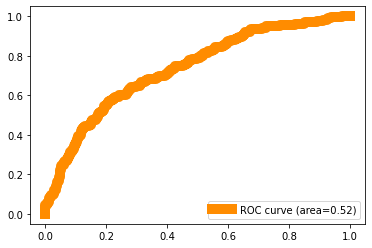

0.5225225225225225
0.7339538555754772


In [172]:
#Roc curve
from sklearn.metrics import roc_curve, roc_auc_score,auc

y_pred_prob=SV.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_prob)
auc_score=roc_auc_score(y_test, pred_SV)
plt.figure
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%0.2f)'%auc_score)
plt.legend(loc="lower right")
plt.show()
print(auc_score)
roc_auc=auc(fpr,tpr)
print(roc_auc)

Observation :

 Receiver Operating Characteristics Area Under The Curve  score is 52 percentage.

Area Under The Curve score is 73 percentage

# Saving Best Model`

In [173]:
#saving the model 
import pickle
filename='Agriculture.pkl'
pickle.dump(SV,open(filename,'wb'))

# Checking Testing data

In [176]:
testing=pd.read_csv('Agriculture_test.csv')
testing.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,28.920374,0,2
1,410,1,1,1,0,0.000000,0,2
2,626,1,0,1,0,0.000000,0,2
3,731,1,0,1,0,0.000000,0,2
4,789,0,0,1,0,0.000000,0,1


In [177]:
testing.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [180]:
#Load the model
fitted_model=pickle.load(open('Agriculture.pkl','rb'))

In [181]:
fitted_model

SVC(C=10, gamma=0.01, probability=True)

In [182]:
predictions=fitted_model.predict(testing)

In [183]:
predictions

array([1., 1., 1., ..., 1., 1., 1.])

# Conclusion 

We did exploratory data analysis for train and test data.

Filled values for null.

Removed outliers using zscore method.

Scaled the data using standard scaler method.

SVC and AdaBoostClassifier are the best model with best random state of 185.

Performed Hyperparameter tuning for SVC.

The CV score is 0.8592677345537758,

The accuracy score is 0.853083853083853,

Receiver Operating Characteristics Area Under The Curve score is 52 percentage.

Area Under The Curve score is 73 percentage

Saved the model and loaded the model.`